In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# **Часть 1**

Создаётся датафрейм на основе данных из варианта

In [ ]:
datafr = {'x1' : [3,3,6,6,7,8,9,9,11,12], 'target' : [10.7,11,13.2,12.4,13.2,13.3,14.4,15.3,14.8,14.8]}
df = pd.DataFrame(data = datafr)
df.head()

,x1,target
0,3,10.7
1,3,11.0
2,6,13.2
3,6,12.4
4,7,13.2


Была обучена модель линейной регрессии. Размер валидационной выборки - 25%.

In [ ]:
x = df['x1'] # признак
y = df['target'] # столбец с целевой переменной target (вектор)
# Разделение выборки на тренировочный и валидационный наборы с
# помощью train_test_split, X- признак, y – целевой признак,
# random_state для воспроизводимости результатов:
X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.25,random_state = 0) #test_size - размер валидационной выборки, которая показывает, насколько хорошо модель оброаботает новые данные
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)# обучение мо-дели на тренировочной выборке



LinearRegression()

 Было выполнено предсказание.

In [ ]:
predictions_valid = model.predict(np.array(X_valid).reshape(-1,1)) # предсказания модели на валидационной выборке ( в predictions_valid хранятся все предсказанные значения для х_валид)
print(predictions_valid)

[12.54102564 15.11153846 13.05512821]


Был создан датафрейм с истинными и предсказанными значениями

In [ ]:
df_match = pd.DataFrame({'Actual' : y_valid, 'Predicted' : predictions_valid}) # датафрейм для сравнения предсказанных и реальных значений
print(df_match.head(10))

   Actual  Predicted
2    13.2  12.541026
8    14.8  15.111538
4    13.2  13.055128


Был оценен алгоритм с помощью метрик (MSE, MAE, RMSE, R2)
>  MSE (Mean Squared Error) – среднее значение квадратов ошибок,позволяет оценить, насколько сильно модель отклоняется от истинных значений целевой переменной. Чем меньше значение MSE, тем более точно модель предсказывает значения. Однако, MSE имеет особенность оптимизировать ошибки в среднем, что может привести к недопониманию экстремальных значений или выбросов.

> Средняя абсолютная ошибка MAE (Mean absolute error) – среднее абсолютное значение

> Среднеквадратичная ошибка RMSE – квадратный корень из среднего квадрата ошибок (MSE)


> Коэффициент детерминации R2 – метрика, которую нужно максимизировать, определяет долю изменений, обусловленных влиянием признаков на целевую переменную





In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_valid, predictions_valid))

print("Mean Squared Error: ", metrics.mean_squared_error(y_valid, predictions_valid))

print ("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)))

print("R2 metric: ", metrics.r2_score(y_valid, predictions_valid))

Mean Absolute Error:  0.3717948717948711
Mean Squared Error:  0.18409708525093058
Root Mean Squared Error:  0.4290653624460154
R2 metric:  0.6763918423323492


Т.к. размер валидационной выборки был выбран 25%, в датафрейм реальных и предсказанных значений попало лишь 3 значения. Значение MSE достаточно низко (0.184), что значит, что модель достаточно точно предсказывает значения. Значение MAE (0.37) может говорить о том, что среднее абсолютное отклонение между прогнозируемыми и фактическими значениями тоже достаточно низко, что значит, что модель достаточно хорошо прогнозирует целевую переменную. RMSE также достаточно низко (0.429), что также говорит о том, что прогнозы достаточно точны, коэффициент R2 же равен 0.676, что является средним значением, что значит, что модель достаточно хороша для обработки данных, но возхможно улучшение результата.

Далее были получены коэффициенты регрессии для графика прямой линии.

In [ ]:
#получение коэффициентов регрессии
a = model.coef_
b = model.intercept_
#вывод
print(f'коэфф наклона = {a}, коэфф сдвига = {b}')

коэфф наклона = [0.51410256], коэфф сдвига = 9.456410256410257


Была выполнена визуализация регрессии.

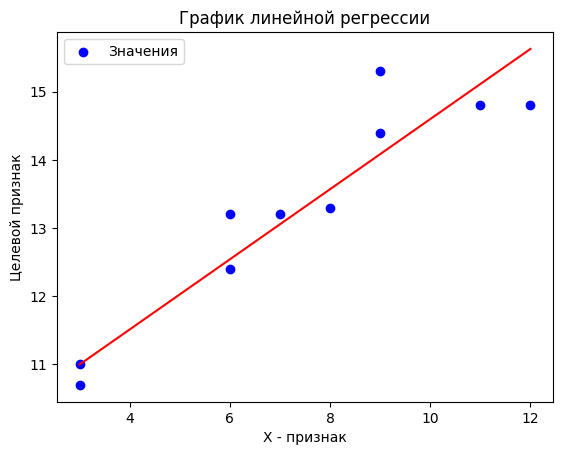

In [ ]:
plt.scatter(df['x1'], df['target'], color = 'b', label = 'Значения') # точечный график зависимости целевого столбца от конкретного столбца

plt.plot(x, a*x+b, "r") # x - значения из датасета

plt.title('График линейной регрессии')
plt.xlabel('X - признак')
plt.ylabel('Целевой признак')
plt.legend()


Данный график визуализирует результат линейной регрессии, что позволяет сделать выводы по результатам машинного обучения с данной моделью обучения

Был построен график с разницей предсказанного и истинного значения по каждой точке

Text(0.5, 1.0, 'График с разницей предсказанного и истинного значения по каждой точке')

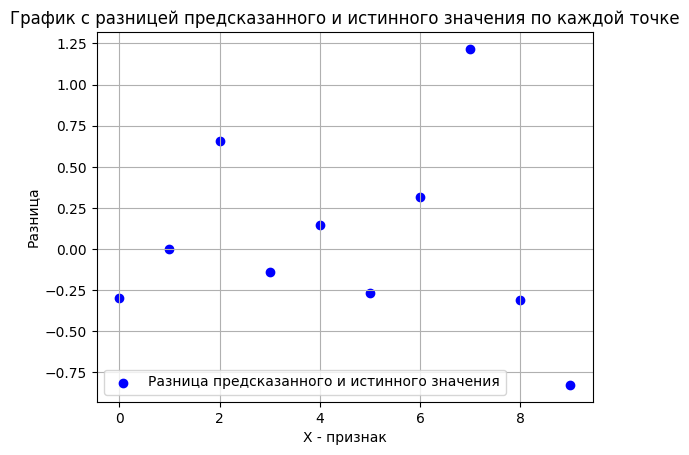

In [ ]:
df2 = pd.DataFrame()
df2['predicts'] = model.predict(df['x1'].values.reshape(-1,1))
df2['diffs'] = df['target'] - df2['predicts']

plt.scatter(df['target'].index,df2['diffs'], c = "b", label = "Разница предсказанного и истинного значения")
plt.xlabel('X - признак')
plt.ylabel('Разница')
plt.legend()
plt.grid()


plt.title('График с разницей предсказанного и истинного значения по каждой точке')

На данном графике видна разница между предсказанными и истинными значениями, чем ближе значение к нулю, тем лучше ближе предсказанное значение к истинному. По данному графику можно сказать, что данная модель достаточно хорошо предсказала значения для данной модели обучения

Был построен график предсказанных и истинных значений

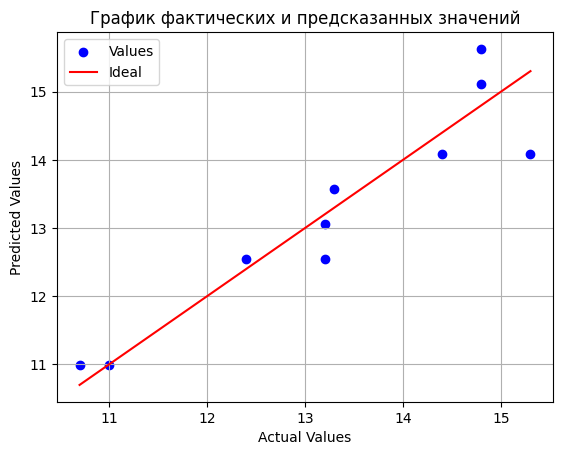

In [ ]:
predictions_valid_1 = model.predict(np.array(df['x1']).reshape(-1,1))
plt.scatter(df['target'], predictions_valid_1, color = 'b', label = "Values")

plt.plot([min(df['target']),max(df['target'])], [min(df['target']),max(df['target'])],'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

По данныим графикам можно сделать вывод, что линейная регрессия не позволяет с большой точностью предсказывать значения целевой переменной. Для высокой точности лучше использовать другую модель машинного обучения и/или увеличить количество данных.

# **Часть 2**

В датафрейм был добавлен столбец со значениями x2, были объединены x1 и x 2 в массив формы (10,2) в переменную x, в переменной y хранится столбец с целевой переменной target.

In [ ]:
df['x2'] = [9, 8, 9, 7, 4, 5, 3, 5, 1, 0]

y = np.array(df['target'])# столбец с целевой переменной target вектор
x = np.array(df.drop(['target'], axis=1)) # матрица объъект-признак X (все столбцы набора данных, кроме целевого

Была обучена модель множественной линейной регрессии, которая зависит от двух предикторов x

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

Было выполнено предсказание

In [ ]:
predictions = model.predict(x)

Был создан и выведен датафрейм с истинными и предсказанными значениями

In [ ]:
df2 = pd.DataFrame({"Actual": y, "Predicted": predictions})
df2.head(10)

,Actual,Predicted
0,10.7,11.073200
1,11.0,10.817187
2,13.2,13.279052
3,12.4,12.767026
4,13.2,12.734272
5,13.3,13.725569
6,14.4,13.948828
7,15.3,14.460853
8,14.8,14.907371
9,14.8,15.386642


Были подсчитаны и выведены метрики качества регрессии (MSE, MAE, RMSE, R2)

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y, predictions))

print("Mean Squared Error: ", metrics.mean_squared_error(y, predictions))

print ("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y, predictions)))

print("R2 metric: ", metrics.r2_score(y, predictions))

Mean Absolute Error:  0.38777196829144833
Mean Squared Error:  0.19750683083150578
Root Mean Squared Error:  0.44441740608520924
R2 metric:  0.9125650401383392


Значение MSE достаточно низко (0.197), что значит, что модель достаточно точно предсказывает значения. Значение MAE (0.387) может говорить о том, что среднее абсолютное отклонение между прогнозируемыми и фактическими значениями тоже достаточно низко, что значит, что модель достаточно хорошо прогнозирует целевую переменную. RMSE также достаточно низко (0.444), что также говорит о том, что прогнозы достаточно точны, коэффициент R2 же равен 0.912, что крайне близко к 1, что значит, что модель достаточно хорошо соответствует данным.

Были получены и выведены коэффициенты a и b

In [ ]:
a = model.coef_
b = model.intercept_
print(f'коэфф наклона = {a}, коэфф сдвига = {b}')

коэфф наклона = [0.7352842  0.25601282], коэфф сдвига = 6.56323157362118


Был построен график с разницей предсказанного и истинного значения по каждой точке

Text(0.5, 1.0, 'График с разницей предсказанного и истинного значения по каждой точке')

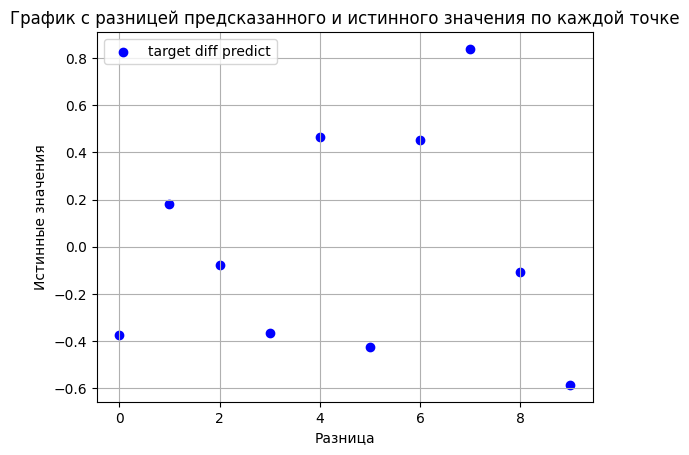

In [ ]:
df2 = pd.DataFrame()
df2['predicts'] = model.predict(x)
df2['diffs'] = df['target'] - df2['predicts']

plt.scatter(df['x1'].index, df2['diffs'], color = 'b', label = "target diff predict")
plt.grid()
plt.legend()
plt.xlabel("Разница")
plt.ylabel("Истинные значения")
plt.title("График с разницей предсказанного и истинного значения по каждой точке")


По данному графику можно сделать вывод, что данная модель обучения лучше чем простая линейная регрессия за счёт того, что большее количество значений были предсказаны с меньшей разницей


# **Часть 3**

Был создан датафрейм с данными по варианту

In [ ]:
data = {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],'y': [29.5, 54.7, 67.5, 97.4, 102.8, 118.2, 131.7, 131.7, 128.7, 133.0]}
df = pd.DataFrame(data = data)
df.head(10)

,x,y
0,0,29.5
1,1,54.7
2,2,67.5
3,3,97.4
4,4,102.8
5,5,118.2
6,6,131.7
7,7,131.7
8,8,128.7
9,9,133.0


Для реализации модели полиномиальной регрессии был использован PolynomoialFeatures,

In [ ]:
x1 = np.array(df['x'])
y1 = np.array(df['y'])
poly_features1 = PolynomialFeatures(degree=2)
X_poly1 = poly_features1.fit_transform(x1.reshape(-1,1))

linear1 = LinearRegression()
linear1.fit(X_poly1, y1)
linear1.intercept_,linear1.coef_

(28.52090909090937, array([ 0.        , 26.06204545, -1.62386364]))

Было выполнено предсказание и создан датафрейм, хранящий в себе целевые значения и предсказанные

In [ ]:
predictions1=linear1.predict(X_poly1)
df1 = pd.DataFrame({'actuals': df['y'], 'predicts': predictions1})

print(df1.head(10))

   actuals    predicts
0     29.5   28.520909
1     54.7   52.959091
2     67.5   74.149545
3     97.4   92.092273
4    102.8  106.787273
5    118.2  118.234545
6    131.7  126.434091
7    131.7  131.385909
8    128.7  133.090000
9    133.0  131.546364


Были подсчитаны и выведены метрики качества регрессии (MAE, R2).

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df['y'], predictions1))
print('R2 metric:', metrics.r2_score(df1['actuals'], predictions1))

Mean Absolute Error: 3.012272727272715
R2 metric: 0.9885382272092619


R2 метрика достаточно близка к 1, что значит, что система почти идеально предказывает значения, MAE же достаточно большой, чтобы можно было сказать то же самое по этой метрике.

Была создана визуализация регрессии: точки и линии регрессии.

Text(0.5, 1.0, 'Регрессия')

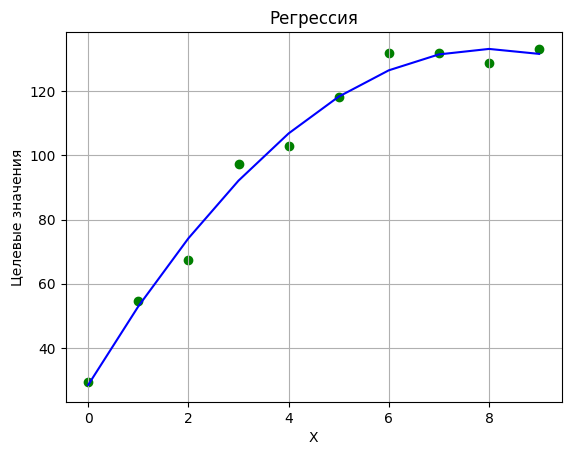

In [ ]:
plt.scatter(df['x'],df['y'], label = "Истинное значение", color = 'g')
plt.plot(df['x'], df1['predicts'], label = "Предсказанные значения", color = 'b')
plt.grid()
plt.xlabel("X")
plt.ylabel("Целевые значения")
plt.title("Регрессия")


По данному графику можно сделать вывод, что предсказанные по данной модели обучения значения достаточно близки к целевым

Модель полиномиальной регрессии со степенью 5 была обучена, было выполнено предсказание, предсказания были сравнены с истинными значениями

In [ ]:
x2 = np.array(df['x'])
y2 = np.array(df['y'])
poly_features2 = PolynomialFeatures(degree=5)
X_poly2 = poly_features2.fit_transform(x2.reshape(-1,1))

linear2 = LinearRegression()
linear2.fit(X_poly2, y2)
b = linear2.intercept_
a = linear2.coef_
predictions2=linear2.predict(X_poly2)

df2 = pd.DataFrame({'actuals': df['y'], 'predicts': predictions2})

print(df2.head(10))

   actuals    predicts
0     29.5   29.571748
1     54.7   53.492028
2     67.5   72.240979
3     97.4   89.927692
4    102.8  106.679441
5    118.2  120.470909
6    131.7  128.953427
7    131.7  131.284196
8    128.7  129.955524
9    133.0  132.624056


Были подсчитаны и выведены метрики качества регрессии (MAE, R2).

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df['y'], predictions2))
print('R2 metric:', metrics.r2_score(df2['actuals'], predictions2))


Mean Absolute Error: 2.4437202797186446
R2 metric: 0.9911363701112672


R2 метрика достаточно близка к 1, что значит, что система почти идеально предказывает значения, MAE же достаточно большой, чтобы можно было сказать то же самое по этой метрике.

Была создана визуализация регрессии: точки и линии регрессии.

Text(0.5, 1.0, 'Регрессия')

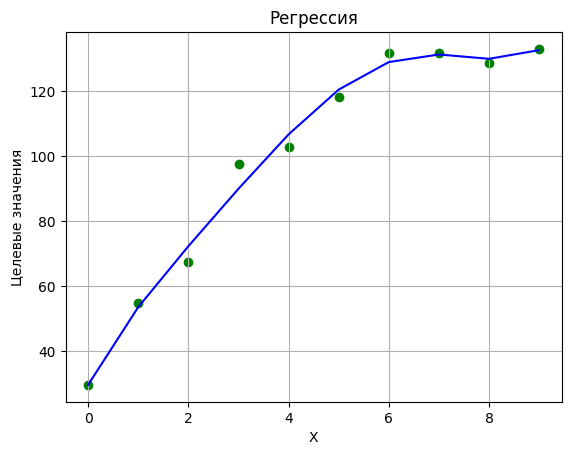

In [ ]:
plt.scatter(df['x'], df['y'], label = "Истинное значение", color = 'g')
plt.plot(df['x'], df2['predicts'], label = "Предсказанные значения", color = 'b')
plt.grid()
plt.xlabel("X")
plt.ylabel("Целевые значения")
plt.title("Регрессия")

По данному графику можно сделать вывод, что предсказанные по данной модели обучения значения достаточно близки к целевым, однако, можно сказать, что модель переобучена, для того, чтобы сделать какие-то выводы, нужно проверить эту модель на других значениях.

Модель полиномиальной регрессии со степенью 10 была обучена, было выполнено предсказание, предсказания были сравнены с истинными значениями

In [ ]:
x3 = np.array(df['x'])
y3 = np.array(df['y'])
poly_features3 = PolynomialFeatures(degree=10)
X_poly3 = poly_features3.fit_transform(x3.reshape(-1,1))

linear3 = LinearRegression()
linear3.fit(X_poly3, y3)
linear3.intercept_,linear3.coef_
predictions3=linear3.predict(X_poly3)

df3 = pd.DataFrame({'actuals': df['y'], 'predicts': predictions3})

print(df3.head(10))

   actuals  predicts
0     29.5      29.5
1     54.7      54.7
2     67.5      67.5
3     97.4      97.4
4    102.8     102.8
5    118.2     118.2
6    131.7     131.7
7    131.7     131.7
8    128.7     128.7
9    133.0     133.0


Были подсчитаны и выведены метрики качества регрессии (MAE, R2).

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df['y'], predictions3))
print('R2 metric:', metrics.r2_score(df3['actuals'], predictions3))

Mean Absolute Error: 5.190088927520264e-08
R2 metric: 1.0


R2 метрика равна 1, что значит, что система идеально предсказывает значения, MAE же достаточно маленький, что также говорит о том, что система достаточно точно предсказывает значения

Была создана визуализация регрессии: точки и линии регрессии.

Text(0.5, 1.0, 'Регрессия')

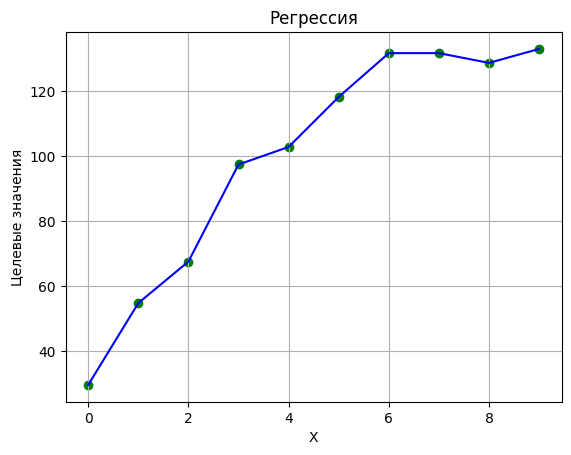

In [ ]:
plt.scatter(df['x'], df['y'], label = "Истинное значение", color = 'g')
plt.plot(df['x'], df3['predicts'], label = "Предсказанные значения", color = 'b')
plt.grid()
plt.xlabel("X")
plt.ylabel("Целевые значения")
plt.title("Регрессия")

По данному графику можно сделать вывод, что предсказанные по данной модели обучения значения совпадают с целевыми, а значит модель идеально предсказывает значения, однако, модель переобучается при столь высоком значении, а значит, что модель так хорошо сработает лишь на этих значениях

В результате реализаций моделей полиномиальной регрессии с разными степенями полинома можно сделать выводы, что при повышении степени, точность предсказаний увеличивается и данная модель обучения выглядит самой успешной среди остальных

# **Часть 4**

Был загружен набор данных.

In [ ]:
df=pd.read_csv('car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


В данном наборе данных целевой переменной можно выделить столбец price т.к. эта переменная зависит от других, её необходимо предсказывать, т.к. это будет полезно для покупателей. Данная переменная была визуализирована посредством boxplot и гистограммы.

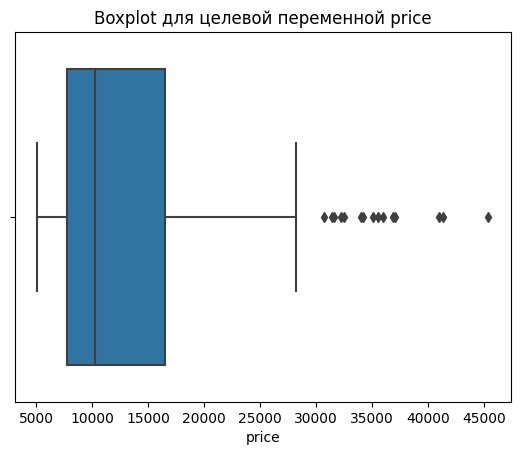

Text(0.5, 1.0, 'Гистограмма для целевой переменной price')

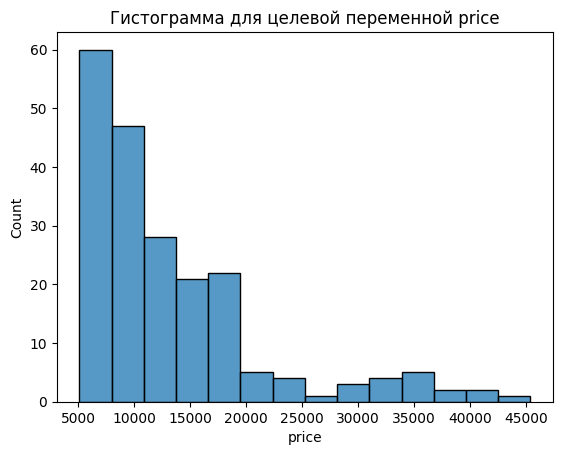

In [ ]:
sns.boxplot(x = 'price', data = df)
plt.title("Boxplot для целевой переменной price")
plt.show()



sns.histplot(x = 'price',data = df)
plt.title("Гистограмма для целевой переменной price")

По данным графикам можно сделать вывод, что большинство автомобилей имеет цену в 5 000 - 20 000, наибольшее число автомобилей (около 60) имеет цену 5 000.

Была построена матрица диаграмм рассеяния

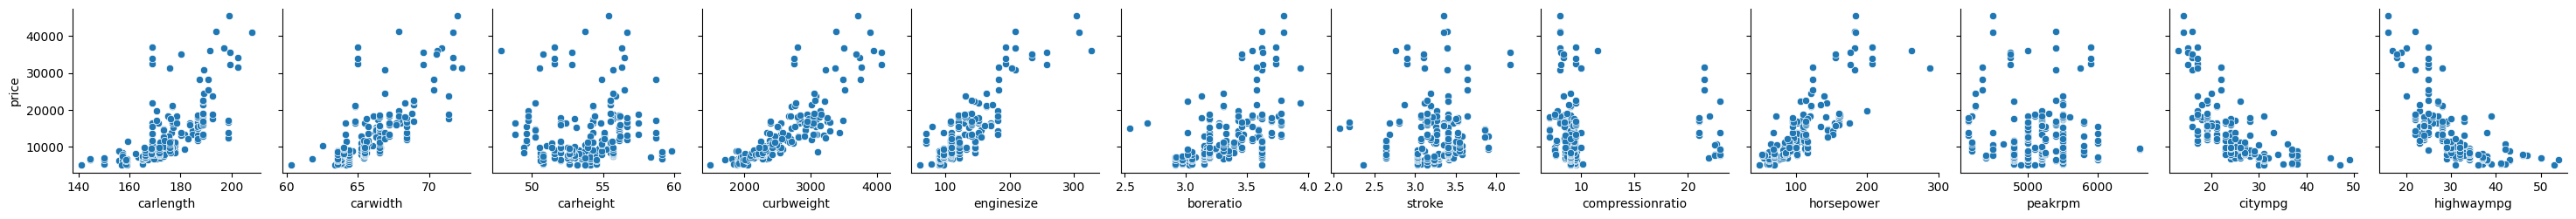

In [ ]:
keys = df[['carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
sns.pairplot(df, x_vars = keys, y_vars = 'price')

На основе данной матрицы диаграмм рассеяния можно сделать следующие выводы:


> Цена автомобиля зависит от пробега по городу и по шоссе (чем выше пробег, тем ниже цена автомобиля)


> Цена автомобиля зависит от лошадиных сил (чем больше лошадиных сил, тем выше цена)


> Цена автомобиля зависит от размера двигателя (при большем размере цена растёт)


> Цена автомобиля не зависит от массы автомобиля без пассажиров и груза



> Цена автомобиля не зависит от других численных показателей











Данные были поделена на обучающую и валидационную выборки

In [ ]:
x = df[['carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
y = df['price']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=0)

Данные были нормализованы

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


Модель была обучена с помощью линейной регрессии

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Были подобраны оптимальные параметры

In [ ]:
params = {  #создаём словарь с названиями гиперпараметров и всеми наборами значений
    "fit_intercept" : [True, False],
    "positive" : [True, False]
}

grid = GridSearchCV(model, params, scoring="neg_mean_squared_error", cv = 5)
grid.fit(X_train, y_train) # запуск обучения
grid.best_params_ # вывод лучших параметров

{'fit_intercept': True, 'positive': True}

Лучшими параметрами для данной ошибки являются fit_intercept: True и positive: True, что значит, что свободный член уравнения линейной регрессии будет включен, также значения в модели будут только положительными

Обучающая модель была применена на тестовой выборке и её качества были оценены с помощью метрик.

In [ ]:
predicts = model.predict(X_valid)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predicts)) #Средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predicts)) #Среднее значение квадратов ошибок

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predicts))) #Квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, predicts)) #Коэффициент детерминации

Mean Absolute Error: 2352.696000552646
Mean Squared Error: 12178737.387097446
Root Mean Squared Error: 3489.8047777916527
R2 metric: 0.8366761469165341




>MAE = 2352, что может означать то, что модель ошибается на эту величину в предсказаниях


> MSE имеет значение 12178737, что является достаточно большим значением, что может говорить о том, что модель неточно предсказывает значения


> Значение RMSE также большое (3489), что указывает на неточное предсказание значений



> Коэффициент детерминации R2 достаточно близко к 1 (0.836), что значит, что модель достаточно точно предсказывает значения









Был создан датафрейм с истинными и предсказанными значениями

In [ ]:

df_match = pd.DataFrame({'Actuals' : y_valid, 'Predicts' : predicts})
print(df_match.head(10))

     Actuals      Predicts
52    6795.0   6249.949987
181  15750.0  19564.403306
5    15250.0  14945.357211
18    5151.0  -1421.682143
188   9995.0  11249.951552
170  11199.0  13510.440286
76    5389.0   5627.431619
154   7898.0   6532.752486
104  17199.0  23627.702755
33    6529.0   8035.569396


Был создан датафрейм с признаками и значениями коэффициентов для каждого признака.

In [ ]:
coefs = model.coef_

df_coef = pd.DataFrame({"X" :x.columns, 'Coeffs' : coefs})
df_coef['ABS'] = abs(df_coef['Coeffs'])
df_coef = df_coef.sort_values(by = 'ABS', ascending = False)
print(df_coef)

                   X       Coeffs          ABS
4         enginesize  4148.485731  4148.485731
10           citympg -2531.196776  2531.196776
11        highwaympg  1859.465740  1859.465740
3         curbweight  1507.769341  1507.769341
1           carwidth  1463.686762  1463.686762
7   compressionratio  1327.572276  1327.572276
8         horsepower  1261.144722  1261.144722
9            peakrpm  1117.864553  1117.864553
0          carlength -1067.534853  1067.534853
6             stroke  -848.309929   848.309929
2          carheight   410.215232   410.215232
5          boreratio  -186.432108   186.432108


По полученным данным можно сделать следующие выводы:


> Наибольшее влияние на предсказание цены автомобиля оказывают параметры enginesize,citympg,highwaympg, curbweight и carwidth. Причем только citympg оказывает отрицательное влияние.


> Соответственно параметры boreratio, carheight, stroke, carlength и peakrpm оказывают наименьшее влияние на предсказание цен автомобиля




Была выполнена визуализация. На графике были отображены фактические и предсказанные значения


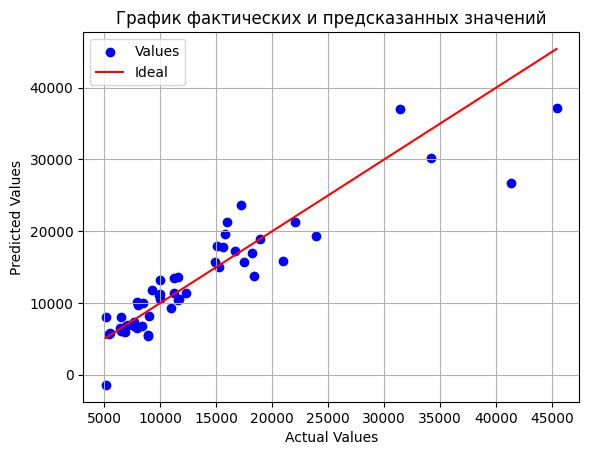

In [ ]:
plt.scatter(y_valid, predicts, color = 'b', label = "Values")

plt.plot([min(y_valid),max(y_valid)], [min(y_valid),max(y_valid)],'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

На основе графика можно сделать вывод, что модель достаточно неточно предсказывает цены автомобилей

# **Метод k-ближайших соседей**

Была создана модель регрессии методом k-ближайших соседей. Кол-во соседей - 10

In [ ]:
neighboor_model = KNeighborsRegressor(n_neighbors = 10)
neighboor_model.fit(X_train, y_train)
neighboor_model_preds = neighboor_model.predict(X_valid)
df_neighboor = pd.DataFrame({"Actuals":y_valid,"Predicts":neighboor_model_preds})
print(df_neighboor.head(10))

     Actuals    Predicts
52    6795.0   6676.2000
181  15750.0  17259.9167
5    15250.0  11211.0167
18    5151.0   6141.1000
188   9995.0  10151.3000
170  11199.0  10820.2000
76    5389.0   6142.1000
154   7898.0   7485.5000
104  17199.0  15508.5167
33    6529.0   6920.1000


Было оценено качество модели на основе 4 метрик


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, neighboor_model_preds))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, neighboor_model_preds))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, neighboor_model_preds)))

print('R2 metric:', metrics.r2_score(y_valid, neighboor_model_preds))

Mean Absolute Error: 2558.8355749999996
Mean Squared Error: 20986375.513747156
Root Mean Squared Error: 4581.088900441374
R2 metric: 0.7185606683010529



>MAE = 2558, что может означать то, что модель ошибается на эту величину в предсказаниях


> MSE имеет значение 20986375, что является достаточно большим значением, что может говорить о том, что модель неточно предсказывает значения


> Значение RMSE также большое (4581), что указывает на неточное предсказание значений



> Коэффициент детерминации R2 менее близко к 1 (0.71), чем в модели линейной регрессии, что значит, что модель достаточно точно предсказывает значения, однако хуже, чем модель линейной регрессии


По этим данным можно сделать вывод, что модель недостаточно точно предсказывает значения в сравнении с моделью линейной регрессии

Фактические и предсказанные данные были визуализированы

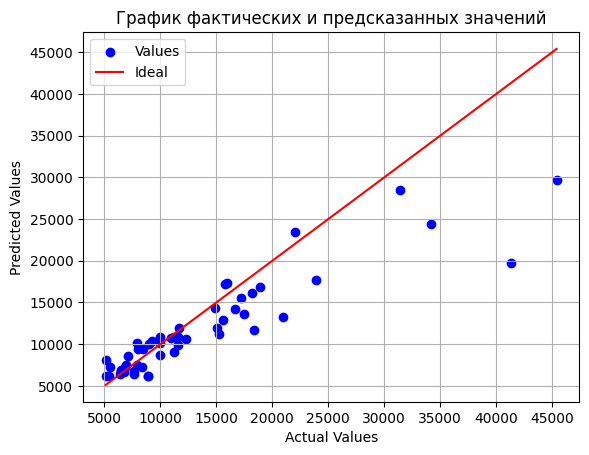

In [ ]:
plt.scatter(y_valid, neighboor_model_preds, color = 'b', label = "Values")
plt.plot([min(y_valid),max(y_valid)], [min(y_valid),max(y_valid)],'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

По данному графику можно сделать вывод, что данная модель предсказывает значения хуже, чем модель простой линейной регрессии

# **Дерево решений**

Была создана модель регрессии методом дерева решений

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

decision_tree_preds = decision_tree.predict(X_valid)
df_tree = pd.DataFrame({"Actual" : y_valid, "Predicts" : decision_tree_preds})
print(df_tree.head(10))

      Actual  Predicts
52    6795.0    6095.0
181  15750.0   18280.0
5    15250.0   13950.0
18    5151.0    5399.0
188   9995.0    9549.0
170  11199.0   17669.0
76    5389.0    5572.0
154   7898.0    6918.0
104  17199.0   18399.0
33    6529.0    7129.0


Была произведена оценка качества модели на основе 4 метрик.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, decision_tree_preds)) #Средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, decision_tree_preds)) #Среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, decision_tree_preds))) #Квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, decision_tree_preds)) #Коэффициент детерминации

Mean Absolute Error: 2016.2051346153846
Mean Squared Error: 8829368.006767096
Root Mean Squared Error: 2971.425248389583
R2 metric: 0.881593111229672


>MAE = 2216, что может означать то, что модель ошибается на эту величину в предсказаниях


> MSE имеет значение 10900736, что является достаточно большим значением, что может говорить о том, что модель неточно предсказывает значения


> Значение RMSE также большое (3301), что указывает на неточное предсказание значений



> Коэффициент детерминации R2 более близко к 1 (0.85), чем в модели линейной регрессии и в модели k-соседей, что значит, что модель достаточно точно предсказывает значения.

По данным значениям можно сделать вывод, что данная модель обучения точнее предсказывает значения, чем модель k-ближайших соседей и модель простой линейной регрессии

Данны были визуализированы

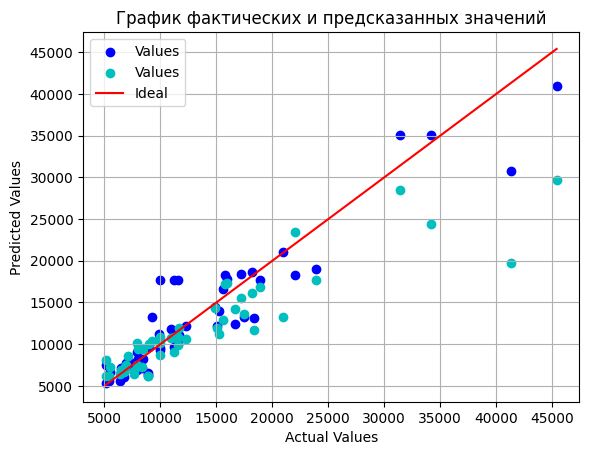

In [ ]:
plt.scatter(y_valid, decision_tree_preds, color = 'b', label = "Values")
plt.scatter(y_valid, neighboor_model_preds, color = 'c', label = "Values")
plt.plot([min(y_valid),max(y_valid)], [min(y_valid),max(y_valid)],'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

По данному графику можно сделать вывод, что данная модель обучения точнее остальных ранее использованных предсказывает значения

Данные всех трёх моделей были визуализированы на одном графике для более точного исследования

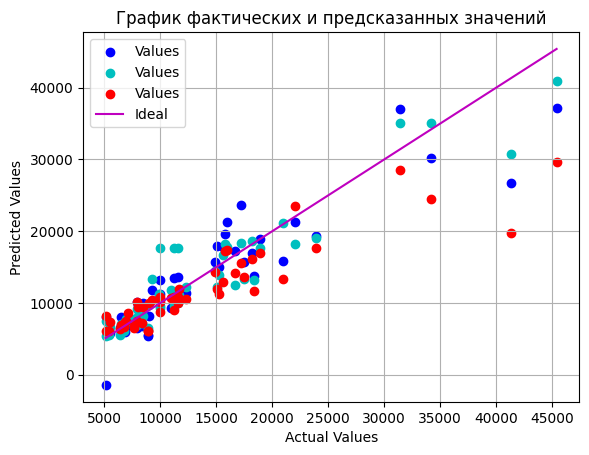

In [ ]:
#линейная регрессия
plt.scatter(y_valid, predicts, color = 'b', label = "Values")
#дерево решений
plt.scatter(y_valid, decision_tree_preds, color = 'c', label = "Values")
#к-соседи
plt.scatter(y_valid, neighboor_model_preds, color = 'r', label = "Values")

plt.plot([min(y_valid),max(y_valid)], [min(y_valid),max(y_valid)],'m', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

На данном графике видно, что модель обучения "дерево решений" наиболее точно предсказывает значения

На основе проведенных тестов можно сделать вывод, что из всех изученных моделей обучения наиболее точно предсказывает модель дерева решений и модель полиномиальной регрессии, однако в случае полиномиальной регрессии может наступить переобучение модели. Модели были обучены на основе данных о цене автомобиля, были сделаны соответствующие выводы (о зависимости между целевым признаком и остальными). Был проанализирован датасет, содержащий информацию о цене машины, количестве дверей, объеме двигателя, пробеге, количестве лошадиных сил и др. На основе этих данных можно сделать вывод, что цена машины зависит от пробега по городу и по шоссе, от количества лошадиных сил, размера двигателя, но не зависит от массы автомобиля и от других численных показателей. Были предсказаны цены автомобилей на основе этих данных с помощью различных моделей.

Написать функцию, которая будет перебирать все степени полинома от 1 до 10, а затем выбирать степень, для которой будет лучший R2-score. Функция должна возвращать степень полинома и R2-score. Обучите лучшую модель и сделайте предсказание с её помощью.

In [ ]:
data = {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],'y': [29.5, 54.7, 67.5, 97.4, 102.8, 118.2, 131.7, 131.7, 128.7, 133.0]}
df = pd.DataFrame(data = data)
x = np.array(df['x'])
y = np.array(df['y'])

def best_pol_degree(x , y):

  best_R2 = 0
  temp_R2 = 0

  best_degree = 0



  for i in range(1,11):
    poly_features = PolynomialFeatures(degree=i)
    X_poly = poly_features.fit_transform(x.reshape(-1,1))
    X_train, X_valid, y_train, y_valid = train_test_split(X_poly, y, test_size=0.25, random_state=0)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    predictions=linear.predict(X_valid)
    temp_R2 = metrics.r2_score(y_valid, predictions)
    print(f'R2 metric for degree = {i} is',temp_R2)
    if best_R2 < temp_R2:
      best_R2 = temp_R2
      best_degree = i
  print(f"Best degree is {best_degree}, R2 is: {best_R2}", '\n')
  return (best_degree)

best_degree = best_pol_degree(x,y)
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(x.reshape(-1,1))
X_train, X_valid, y_train, y_valid = train_test_split(X_poly, y, test_size=0.25, random_state=0)
linear = LinearRegression()
linear.fit(X_train, y_train)
predictions=linear.predict(X_valid)

df1 = pd.DataFrame({'actuals': y_valid, 'predicts': predictions})
print(f"Predicts and actuals for model with the best degree is: ", '\n',df1.head(10))

R2 metric for degree = 1 is 0.8600121179417362
R2 metric for degree = 2 is 0.9097362145750081
R2 metric for degree = 3 is 0.8975691865212386
R2 metric for degree = 4 is 0.8985190553294019
R2 metric for degree = 5 is 0.890452025116853
R2 metric for degree = 6 is 0.7626875207298554
R2 metric for degree = 7 is 0.7100205287350062
R2 metric for degree = 8 is 0.8155692108597844
R2 metric for degree = 9 is -10.291886246978759
R2 metric for degree = 10 is -1085.2333708974036
Best degree is 2, R2 is: 0.9097362145750081 

Predicts and actuals for model with the best degree is:  
    actuals    predicts
0     67.5   76.735543
1    128.7  134.692113
2    102.8  109.811948


По результатам работы кода, можно сделать вывод, что для данной выборки данных для наиболее точного предсказания степень полинома должна быть равна 2, ведь именно при такой степени наибольшее значение метрики R2, что говорит о том, что предсказанные данные достаточно близки к целевым.